In [1]:
import os
import joblib
import matplotlib.pyplot as plt
import numpy as np
import math


In [2]:
FIC_ENTRADA='prediccion_rnn_direct_2capas_30ws_05.joblib'
RUTA_FICHEROS = r"C:\Users\jaume\Documents\Proyecto\datos"


In [3]:
# Carga de datos
os.chdir(RUTA_FICHEROS)

with open(FIC_ENTRADA, 'rb') as file:
    data_dict = joblib.load(file)

# Recuperar DataFrame y scaler
df_results = data_dict['df_results'].copy()
#predictions_test = data_dict['predictions_test'].copy()

In [4]:
print(df_results["learning_curve"].iloc[0].keys())
print({key: type(value) for key, value in df_results["learning_curve"].iloc[0].items()})
print(df_results["learning_curve"].apply(lambda dic: dic.get("lr") if isinstance(dic, dict) else None))
print(df_results.shape[0])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])
{'loss': <class 'list'>, 'mae': <class 'list'>, 'val_loss': <class 'list'>, 'val_mae': <class 'list'>, 'lr': <class 'list'>}
0     [1e-04, 1e-04, 1e-04, 5e-05, 5e-05, 2.5e-05, 2...
1     [1e-04, 1e-04, 1e-04, 5e-05, 5e-05, 2.5e-05, 2...
2     [1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 5e-06, 5e-...
3     [1e-05, 1e-05, 1e-05, 1e-05, 5e-06, 5e-06, 2.5...
4     [1e-04, 1e-04, 1e-04, 5e-05, 5e-05, 2.5e-05, 2...
5     [1e-04, 1e-04, 1e-04, 5e-05, 5e-05, 2.5e-05, 2...
6     [1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 5e-...
7     [1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 5e-06, 5e-...
8     [1e-04, 1e-04, 1e-04, 5e-05, 5e-05, 2.5e-05, 2...
9     [1e-04, 1e-04, 1e-04, 5e-05, 5e-05, 2.5e-05, 2...
10    [1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-...
11    [1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-...
12    [1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...
13    [1e-04, 1e-04, 1e-04, 5e-05, 5e-05, 2.5e-05, 2...
14    [1e-05, 1e-05, 1e-05, 1e-05, 

In [5]:
def plot_all_learning_curves(df_results, n=4):
    """
    Grafica las curvas de aprendizaje (train_loss y val_loss) de cada experimento contenido en df_results.
    
    Cada gráfico tendrá un título con el siguiente formato:
    
      "Curvas de aprendizaje (entrenamiento X) (Mejor modelo)"
      "Cell: <cell_type>, latent_dim: <latent_dim>"
      "dropout: <dropout>, lr: <learning_rate>"
      "batch_size: <batch_size>"
    
    - "X" es el índice (clave) de la ejecución.
    - Se añade "(Mejor modelo)" si ese experimento tiene el menor valor en 'best_val_mse_eval'.
    
    Parámetros:
      - df_results: DataFrame con los resultados de cada ejecución (debe incluir las columnas mencionadas).
      - n: Número máximo de gráficos por fila (por defecto 4).
    """
    # Determinar el experimento "mejor" (el que tenga el menor best_val_mse_eval)
    best_index = df_results['best_val_mse_eval'].idxmin()
    
    num_experiments = len(df_results)
    n_cols = n
    n_rows = math.ceil(num_experiments / n_cols)
    
    # Crear la figura y los subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    # Convertir a un arreglo 1D para iterar fácilmente
    if n_rows * n_cols == 1:
        axs = [axs]
    else:
        axs = axs.flatten()
    
    # Iterar sobre cada experimento
    for i, (idx, row) in enumerate(df_results.iterrows()):
        ax = axs[i]
        
        # Extraer la curva de aprendizaje: se asume que es un diccionario con 'loss' y 'val_loss'
        learning_curve = row['learning_curve']
        epochs = np.arange(1, len(learning_curve['loss']) + 1)
        
        # Graficar la pérdida de entrenamiento y de validación
        ax.plot(epochs, learning_curve['loss'], label="Train Loss")
        ax.plot(epochs, learning_curve['val_loss'], label="Val Loss")
        ax.set_xlabel("Épocas")
        ax.set_ylabel("Loss (MSE)")
        ax.legend(fontsize=8)
        
        # Construir el título:
        # Línea 1: Indicar el índice y si es el mejor modelo
        title_line1 = f"Curvas de aprendizaje (entrenamiento {idx})"
        if idx == best_index:
            title_line1 += " (Mejor modelo)"
        
        # Líneas siguientes: Parámetros de entrenamiento (máximo 2 por línea)
        params = [
            f"Cell: {row['cell_type']}",
            f"latent_dim: {row['latent_dim']}",
            f"dropout: {row['dropout']}",
            f"lr: {row['learning_rate']}",
            f"batch_size: {row['batch_size']}"
        ]
        param_lines = []
        for j in range(0, len(params), 2):
            line = ", ".join(params[j:j+2])
            param_lines.append(line)
        param_text = "\n".join(param_lines)
        
        full_title = title_line1 + "\n" + param_text
        ax.set_title(full_title, fontsize=10)
    
    # Desactivar los subplots que no se usan
    for k in range(i + 1, len(axs)):
        axs[k].axis("off")
    
    plt.tight_layout()
    plt.show()

In [6]:
def plot_training_times(df_results, n=4):
    """
    Grafica los tiempos de entrenamiento por epoch para cada experimento en df_results.
    
    Cada gráfico tendrá un título con el siguiente formato:
    
      "Tiempos de entrenamiento (entrenamiento X) - Total: Y segundos"
      "Cell: <cell_type>, latent_dim: <latent_dim>"
      "dropout: <dropout>, lr: <learning_rate>"
      "batch_size: <batch_size>"
    
    - "X" es el índice del experimento.
    - "Y" es el tiempo total del entrenamiento en segundos.
    
    Parámetros:
      - df_results: DataFrame con los resultados de cada ejecución.
      - n: Número máximo de gráficos por fila (por defecto 4).
    """
    num_experiments = len(df_results)
    n_cols = n
    n_rows = math.ceil(num_experiments / n_cols)
    
    # Crear la figura y los subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    if n_rows * n_cols == 1:
        axs = [axs]
    else:
        axs = axs.flatten()
    
    # Iterar sobre cada experimento
    for i, (idx, row) in enumerate(df_results.iterrows()):
        ax = axs[i]
        
        # Extraer los tiempos por epoch
        epoch_times = row['epoch_times']
        epochs = np.arange(1, len(epoch_times) + 1)
        
        # Graficar los tiempos por epoch
        ax.bar(epochs, epoch_times, color='steelblue', alpha=0.7)
        ax.set_xlabel("Épocas")
        ax.set_ylabel("Tiempo por Epoch (s)")
        
        # Construir el título:
        # Línea 1: Indicar el índice y el tiempo total del entrenamiento
        total_time = row['total_training_time']
        title_line1 = f"Tiempos de entrenamiento (entrenamiento {idx}) - Total: {total_time:.1f} s"
        
        # Líneas siguientes: Parámetros de entrenamiento (máximo 2 por línea)
        params = [
            f"Cell: {row['cell_type']}",
            f"latent_dim: {row['latent_dim']}",
            f"dropout: {row['dropout']}",
            f"lr: {row['learning_rate']}",
            f"batch_size: {row['batch_size']}"
        ]
        param_lines = []
        for j in range(0, len(params), 2):
            line = ", ".join(params[j:j+2])
            param_lines.append(line)
        param_text = "\n".join(param_lines)
        
        full_title = title_line1 + "\n" + param_text
        ax.set_title(full_title, fontsize=10)
    
    # Desactivar los subplots que no se usan
    for k in range(i + 1, len(axs)):
        axs[k].axis("off")
    
    plt.tight_layout()
    plt.show()

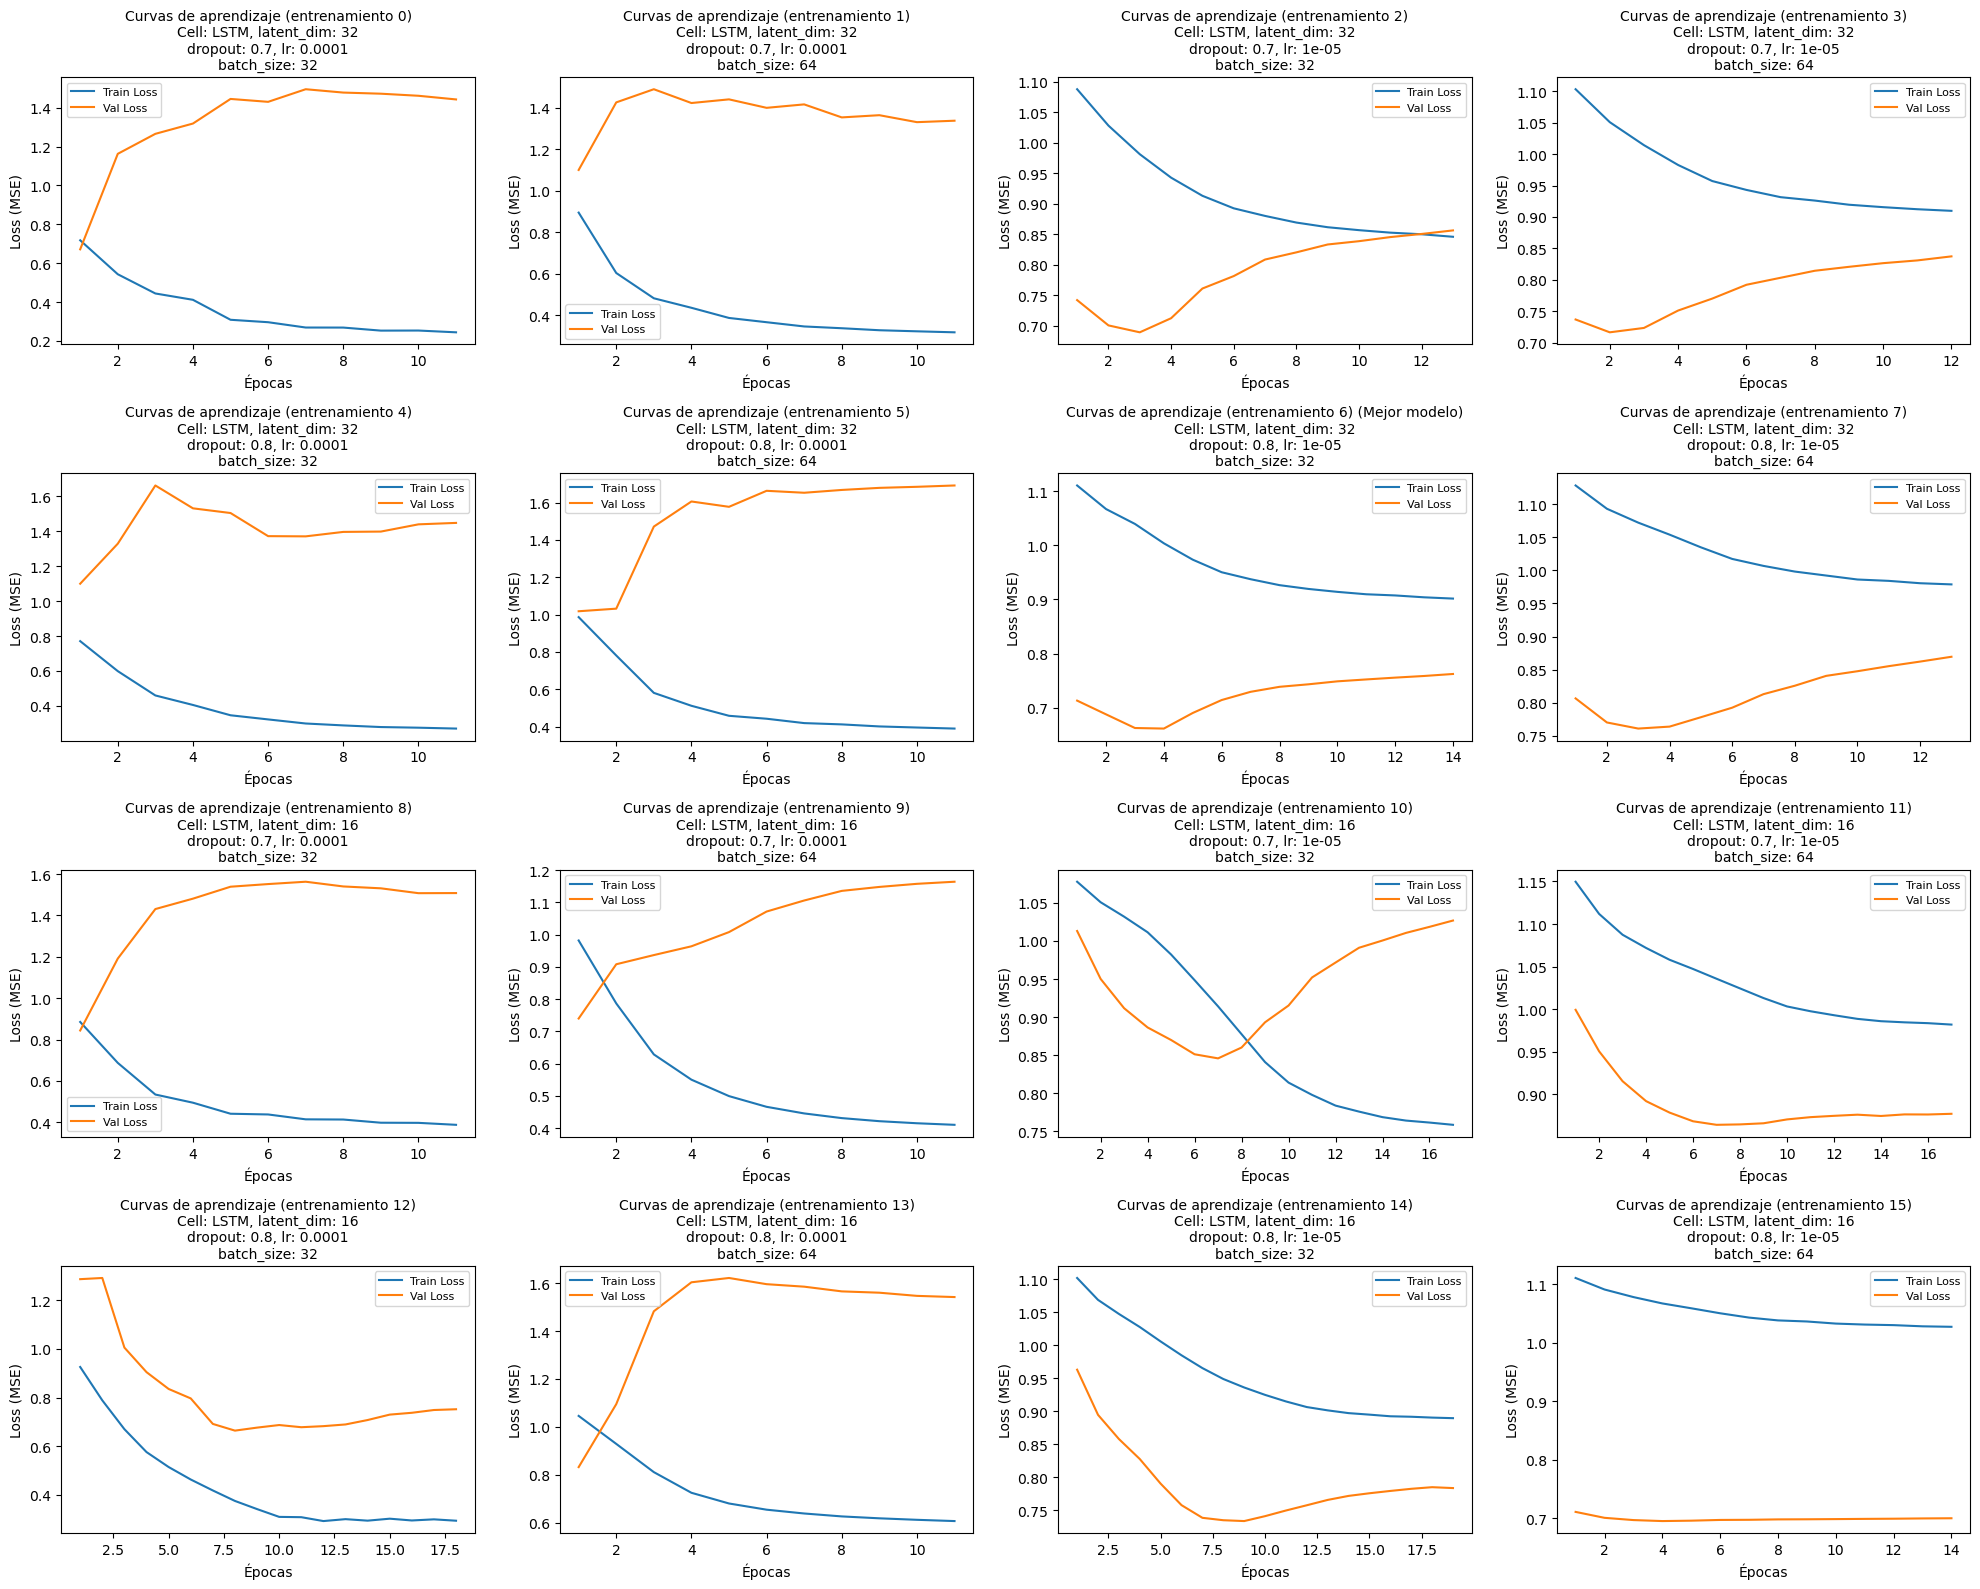

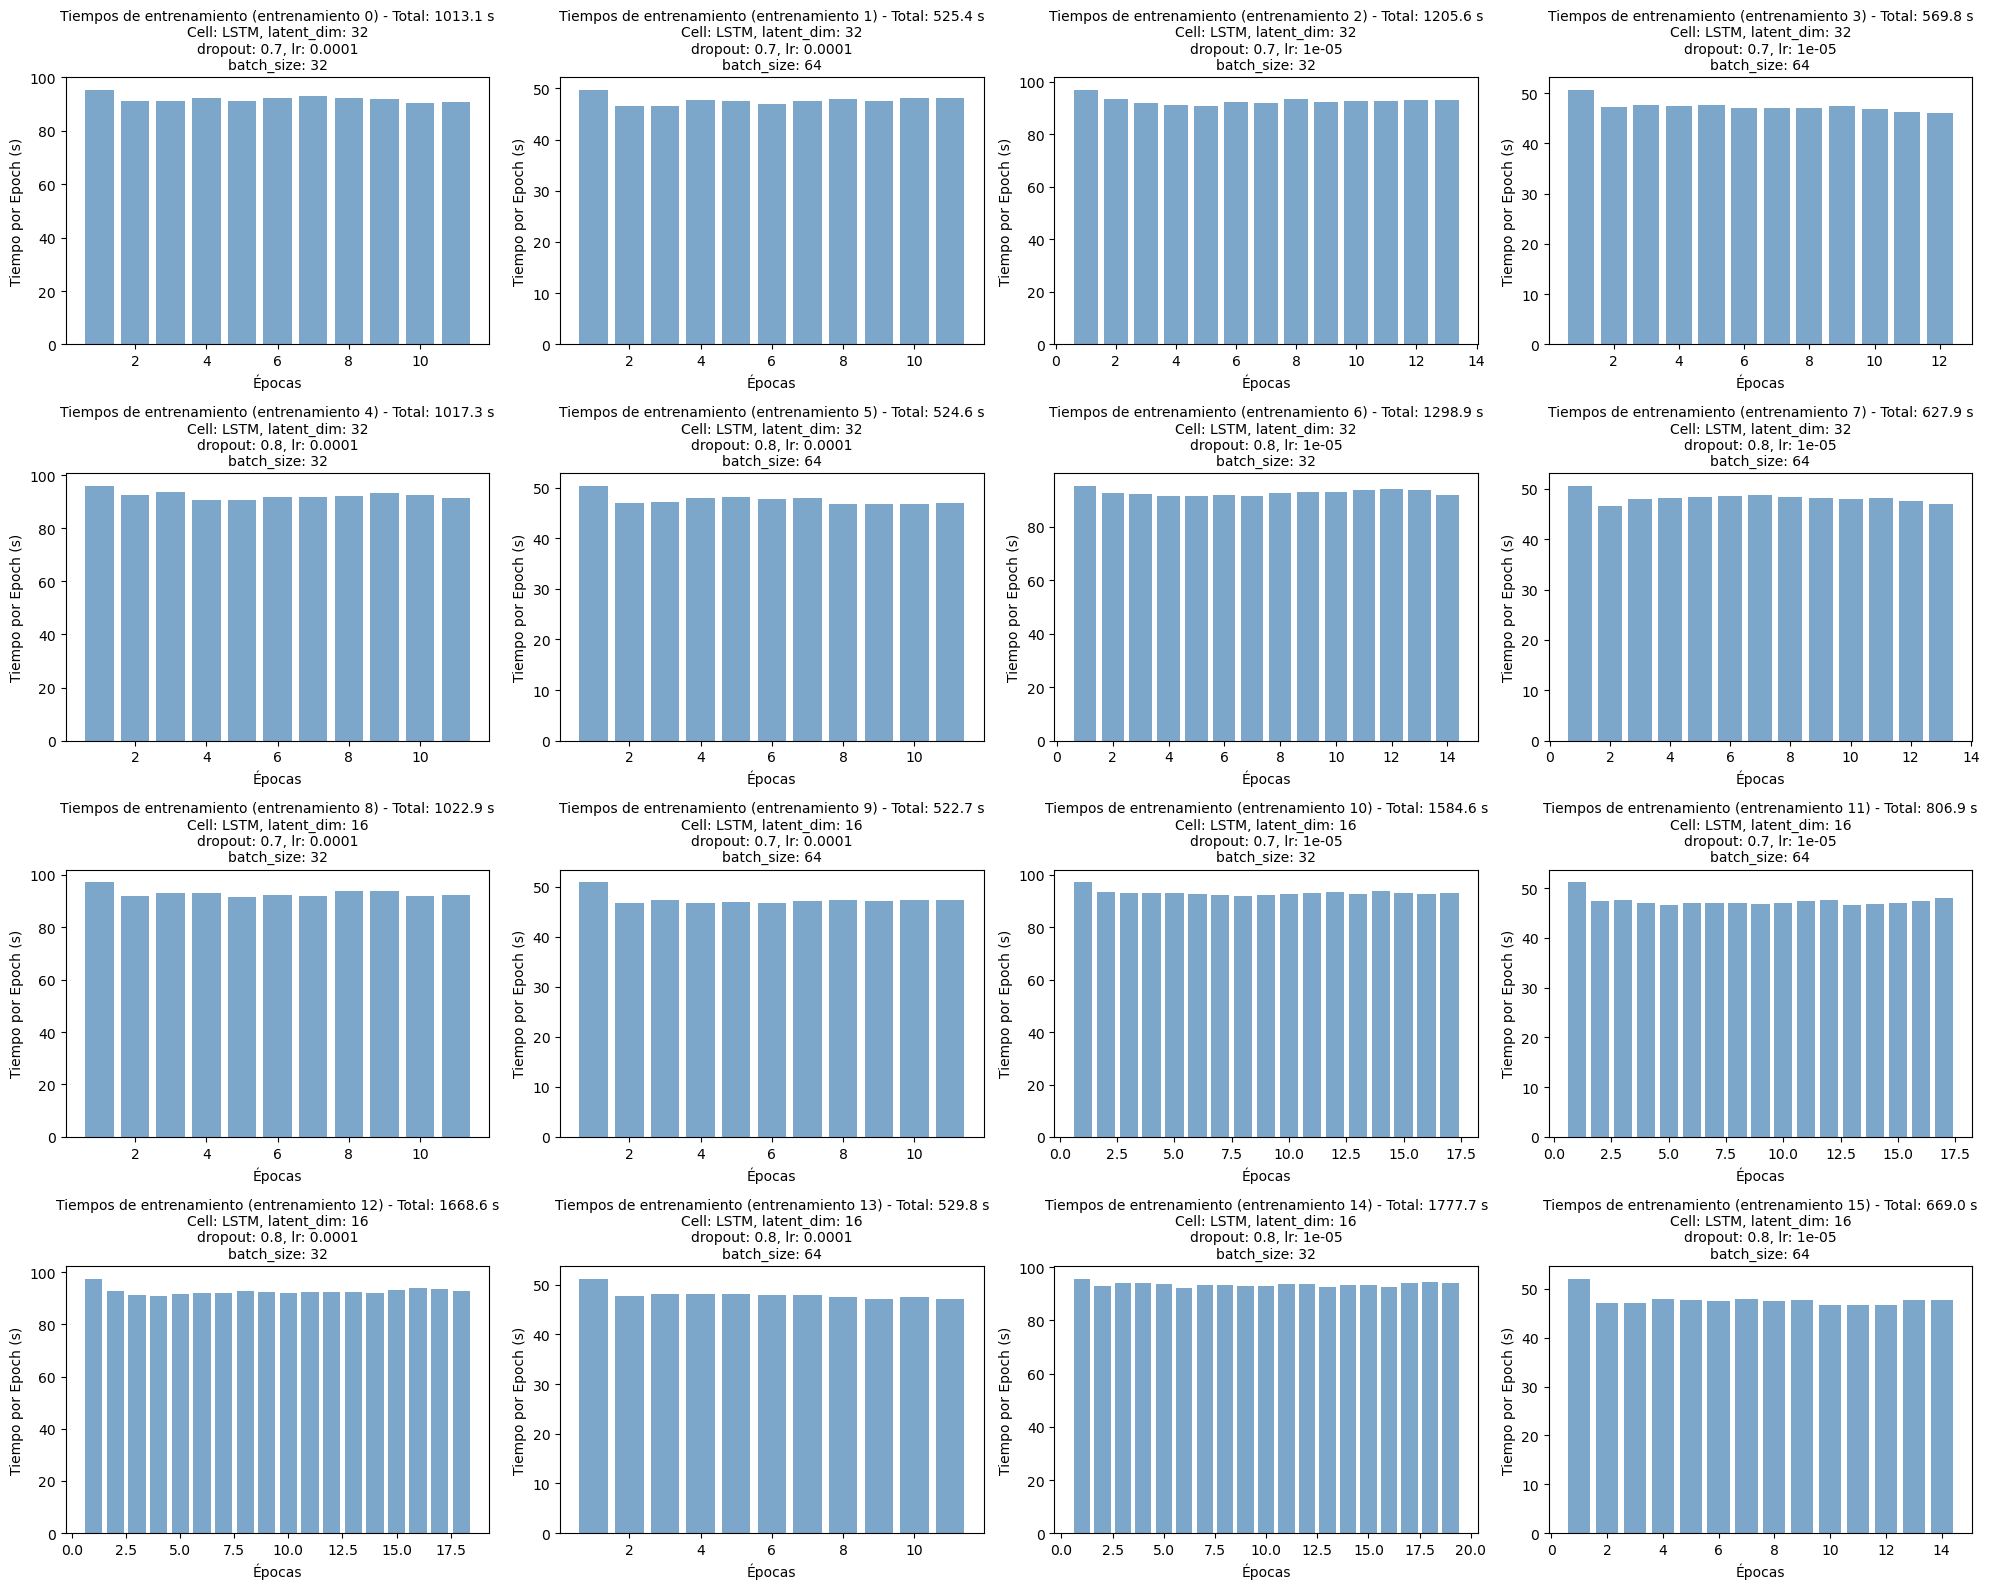

In [7]:
# Graficamos
plot_all_learning_curves(df_results, n=4)
plot_training_times(df_results, n=4)
